# 数据预处理

### 0.1导入依赖

In [1]:
import json
import os
import pandas as pd
import numpy as np

### 0.2加载数据

In [2]:
file_path = os.path.expanduser('~/Desktop/5000.json')
with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

### 0.3 提取特征

In [3]:
recipes = []
for item in data:
    recipe = {
        'id': item.get('id'),
        'title': item.get('title'),
        'intro': item.get('intro'),
        'image': item.get('image'),
        'steps': [step['content'] for step in item.get('steps')],
        'ingredients': item.get('ingredients'),
        'tags': item.get('tags'),
        'notice': item.get('notice'),
        'level': item.get('level'),
        'craft': item.get('craft'),
        'duration': item.get('duration'),
        'flavor': item.get('flavor')
    }
    recipes.append(recipe)

### 0.4 数据清洗

In [4]:
unwanted_words = ['盐', '糖', '油', '酱油', '醋', '姜', '葱', '蒜', '料酒', '胡椒粉',
                  '味精', '白糖', '冰糖', '香油', '淀粉', '生抽', '鸡精', '花椒', '老抽',
                  '辣椒', '孜然粉', '八角', '茴香粉', '桂皮', '料酒', '牛肉粉', '精盐', '生姜',
                  '食盐', '细砂糖', '大蒜', '料酒', '五香粉', '蚝油', '番茄酱', '米醋', '白醋',
                  '味精', '老抽', '红油', '红糖', '蚝油', '香菇粉', '老抽', '豆瓣酱', '白胡椒粉',
                  '料酒', '干辣椒', '花椒粉', '孜然', '胡椒面', '桂皮', '葱姜蒜', '豆豉', '白芝麻',
                  '椒盐', '生姜粉', '红薯粉', '猪油', '鸡蛋', '肉桂', '生抽酱油', '老抽酱油', '高汤',
                  '牛奶', '清汤', '水', '黄油', '鸡精', '味精', '番茄酱', '豆瓣酱', '大蒜末', '姜末',
                  '胡椒', '麻油', '辣椒酱', '豆豉', '花椒粉', '鱼露', '泡椒', '香叶', '丁香', '草果',
                  '肉桂', '八角', '酱油', '料酒', '白醋', '米醋', '红糖', '白砂糖', '橄榄油', '食用油',
                  '蚝油', '香菇粉', '虾米', '香菇', '鸡粉', '味精', '鸡精', '花雕酒', '清水', '香料',
                  '陈皮', '苹果醋', '苹果酱', '红酒', '白酒', '米酒', '鲍鱼汁', '鲍汁', '火锅底料',
                  '炖菜料', '调味料', '酱料', '辣椒粉', '辣酱', '火锅料', '火锅底料', '火锅调料','色拉油','黑胡椒','姜片','姜丝','腌料','大料']
df = pd.DataFrame(recipes)
df_cleaned = df.dropna()

In [5]:
df_cleaned.head()

,id,title,intro,image,steps,ingredients,tags,notice,level,craft,duration,flavor
0,1,红烧鸡翅,,http://i8.meishichina.com/attachment/recipe/20...,"[鸡翅洗净抹干水分，加入腌料拌匀，腌制1小时, 牛腩切3厘米左右的块；土豆一半切1厘米小块另...","{'鸡翅中': '8个', '姜': '2片', '葱': '2根', '盐': '4克',...",[],特点：色泽酱红，鲜香酥嫩。\n小提示：挑选鸡翅时，为了受热均匀，最好全部选用鸡翅中段。,普通,烧,一小时,原味
1,2,萝卜丝鲫鱼汤,,http://i8.meishichina.com/attachment/recipe/20...,"[鲫鱼洗净后放入调味料B腌制20分钟。, 将萝卜丝、高汤、开水3杯，加盖用高火打6分钟。, ...","{'鲫鱼': '1条', '白萝卜丝': '200克', '高汤': '2杯', '料酒':...",[],特点：汤质洁白，味鲜爽口。\n功效：萝卜其性凉味辛甘，可消积滞、化痰清热，下气宽中、解毒。鲫...,普通,煮,三刻钟,原味
2,3,沙茶牛肉,,http://i8.meishichina.com/attachment/recipe/20...,"[牛肉片用白酱油抓匀，再加淀粉拌匀。, 将牛肉片加入沙茶酱、花生酱、白糖、蒜末、味精、再放入...","{'牛肉片': '300克', '青椒片': '75克', '洋葱片': '50克', '沙...",[],特点：牛肉细嫩，酱香味浓。\n功效：中医认为，牛肉有补中益气、滋养脾胃、强健筋骨、化痰息风、...,普通,炒,廿分钟,原味
3,4,五彩鳝丝,,http://i3.meishichina.com/attachment/recipe/20...,"[将鳝丝洗净、沥干，放入调味料B拌匀后，腌制10分钟。, 把腌渍后的鳝丝及原料装入盘内，再加...","{'鳝丝': '300克', '黄椒丝': '30克', '绿椒丝': '30克', '红椒...",[热菜],特点：色彩鲜艳，肉质嫩滑。\n贴心小提示：一般人用微波炉做菜时，将菜放在炉里就不去理会了，其...,普通,炒,半小时,原味
4,5,香菇鲜肉盏,,http://i8.meishichina.com/attachment/recipe/20...,"[香菇去蒂，泡软洗净，里面抹上干淀粉。, 肉末加蛋清、酒、盐、姜汁搅匀至黏稠，等分，酿入香菇...","{'猪肉末': '200克', '香菇': '10克', '鸡蛋清': '1只', '酒':...",[],特点：香润爽口。\n功效：香菇高蛋白、低脂肪、多糖，含有多种氨基酸和多种维生素。多吃香菇能起...,普通,蒸,廿分钟,原味


### 0.5 保存原始数据

In [6]:
df.to_csv('recipes_processed.csv', index=False)


### 0.6关键特征提取

In [7]:
key_features = ['id', 'title', 'ingredients', 'level', 'craft', 'duration', 'flavor']
key_data = df_cleaned[key_features]
key_data.head()

,id,title,ingredients,level,craft,duration,flavor
0,1,红烧鸡翅,"{'鸡翅中': '8个', '姜': '2片', '葱': '2根', '盐': '4克',...",普通,烧,一小时,原味
1,2,萝卜丝鲫鱼汤,"{'鲫鱼': '1条', '白萝卜丝': '200克', '高汤': '2杯', '料酒':...",普通,煮,三刻钟,原味
2,3,沙茶牛肉,"{'牛肉片': '300克', '青椒片': '75克', '洋葱片': '50克', '沙...",普通,炒,廿分钟,原味
3,4,五彩鳝丝,"{'鳝丝': '300克', '黄椒丝': '30克', '绿椒丝': '30克', '红椒...",普通,炒,半小时,原味
4,5,香菇鲜肉盏,"{'猪肉末': '200克', '香菇': '10克', '鸡蛋清': '1只', '酒':...",普通,蒸,廿分钟,原味


### 保存

In [8]:
key_data.to_csv('recipes_keydata.csv', index=False)

### 0.7数据可视化

In [9]:
key_data.describe()

,id,title,ingredients,level,craft,duration,flavor
count,5000,5000,5000,5000,5000,5000,5000
unique,5000,4593,4967,5,31,8,26
top,1,红烧肉,{},普通,炒,十分钟,原味
freq,1,12,9,2915,891,1625,1867


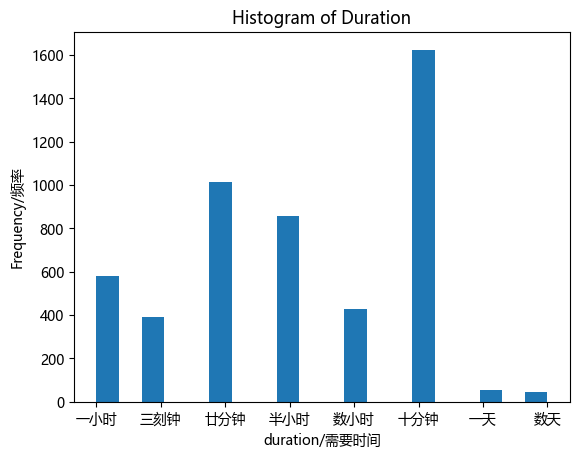

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Microsoft YaHei'
plt.hist(key_data['duration'], bins=20)  #20个等宽区间
plt.xlabel('duration/需要时间')
plt.ylabel('Frequency/频率')
plt.title('Histogram of Duration')
plt.show()

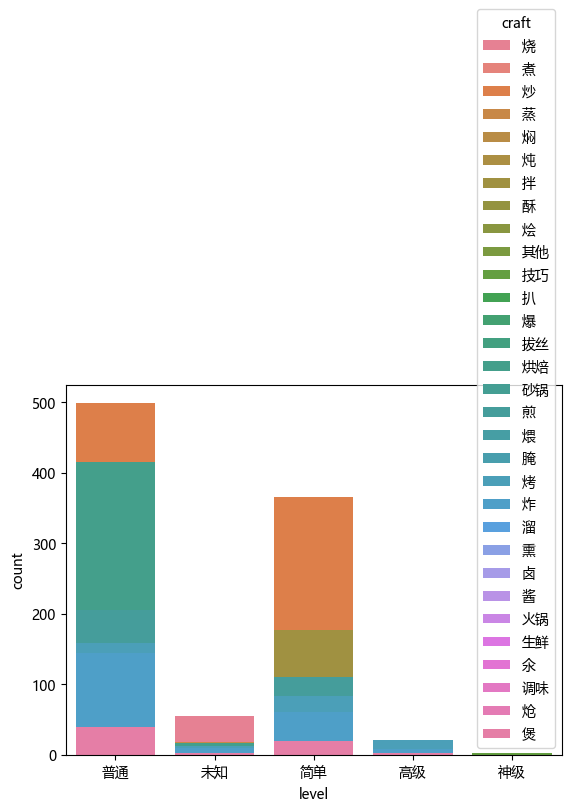

In [11]:
sns.countplot(x='level', hue='craft', data=key_data,dodge=False)
plt.show()

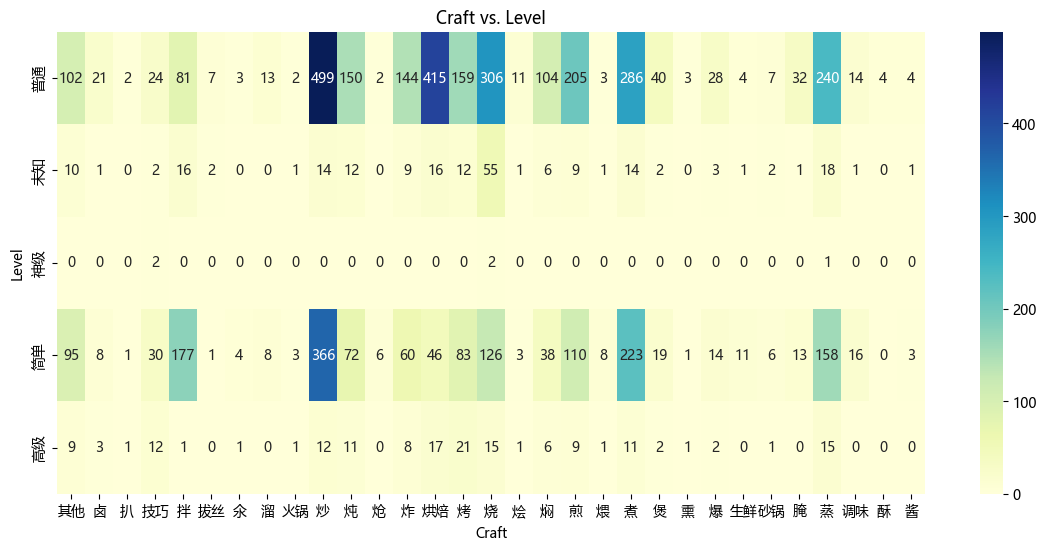

In [12]:
cross_table = pd.crosstab(index=key_data['level'], columns=key_data['craft'])
plt.figure(figsize=(14, 6))
sns.heatmap(cross_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Craft vs. Level')
plt.xlabel('Craft')
plt.ylabel('Level')
plt.show()

### 烹饪时间和烹饪难度的关系

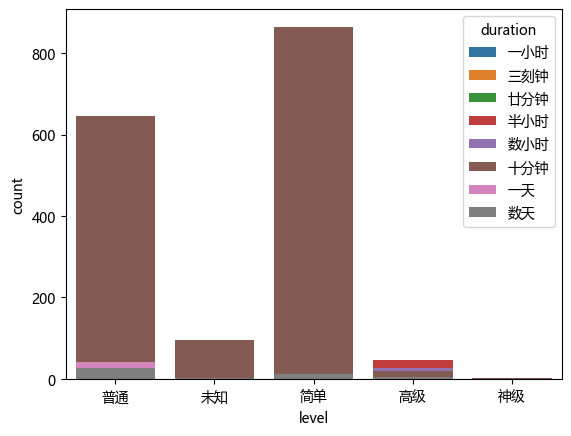

In [13]:
sns.countplot(x='level', hue='duration', data=key_data,dodge=False)
plt.show()

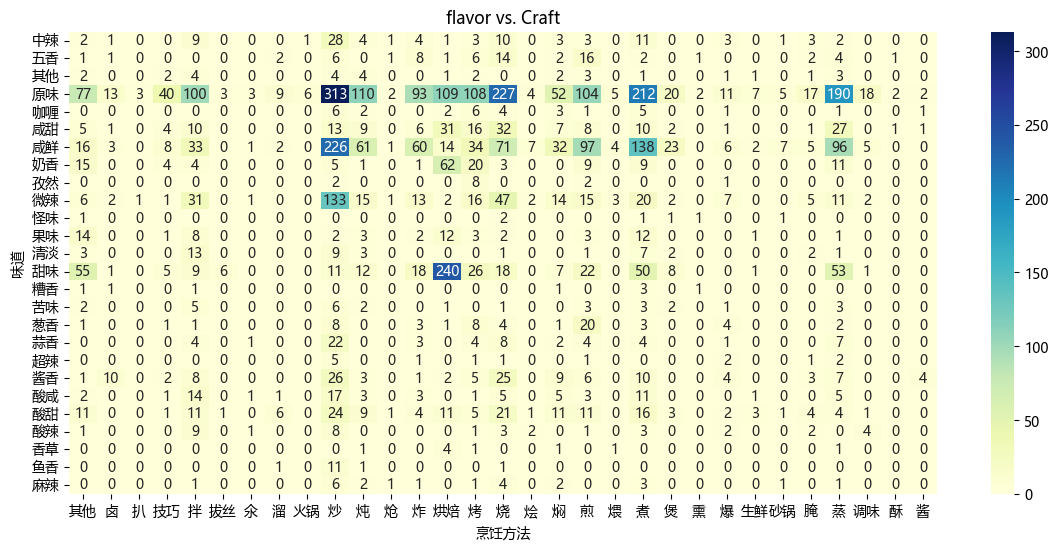

In [14]:
cross_table = pd.crosstab(index=key_data['flavor'], columns=key_data['craft'])
plt.figure(figsize=(14, 6))
sns.heatmap(cross_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title('flavor vs. Craft')
plt.xlabel('烹饪方法')
plt.ylabel('味道')
plt.show()

### 0.8探索食谱中常用的食材

### 获取食材列表

In [15]:
ingredients_list = []
for recipe in data:
    ingredients = recipe.get('ingredients', {})
    ingredients_list.extend([ingredient for ingredient in ingredients.keys() if ingredient not in unwanted_words])

### 统计食材出现次数并将统计结果转换为DataFrame

In [16]:
ingredient_counter = pd.Series(ingredients_list).value_counts()
ingredient_df = pd.DataFrame({'ingredient': ingredient_counter.index, 'count': ingredient_counter.values})
ingredient_df = ingredient_df.sort_values(by='count', ascending=False)

In [17]:
ingredient_df.to_csv('ingredient_counts.csv', index=False)
ingredient_df.head(20)

,ingredient,count
0,面粉,420
1,胡萝卜,362
2,洋葱,316
3,土豆,198
4,青椒,178
5,葱花,177
6,香菜,173
7,黄瓜,157
8,五花肉,156
9,猪肉,148


### 绘制常用食材的柱状图

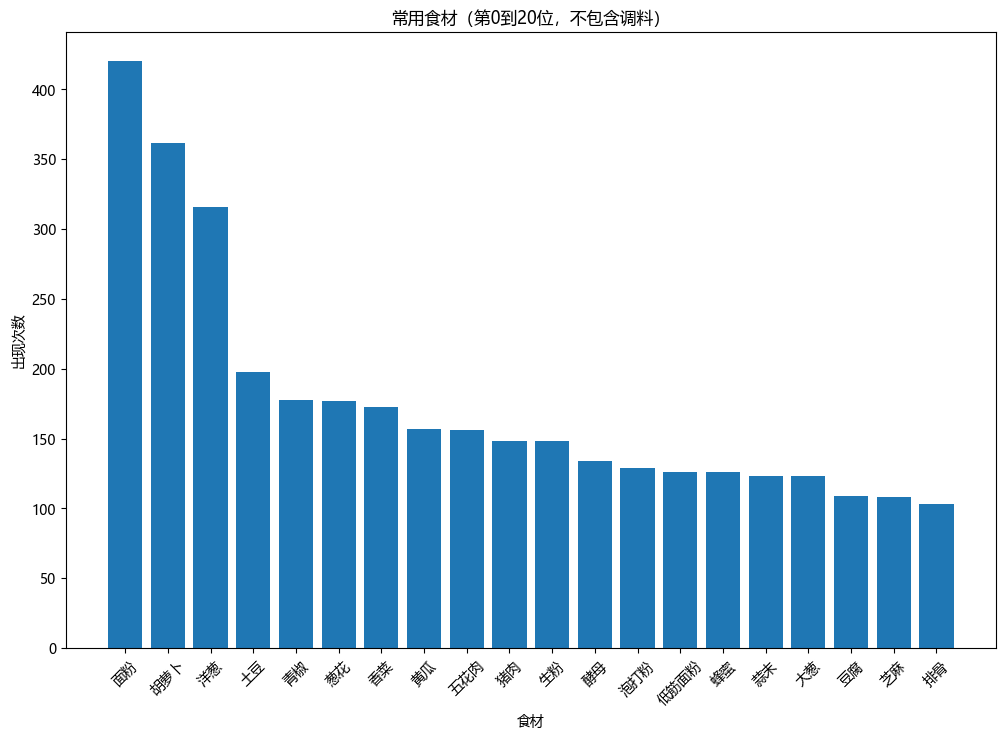

In [18]:
ingredient_df_filtered = ingredient_df[~ingredient_df['ingredient'].isin(unwanted_words)]
plt.figure(figsize=(12, 8))
plt.bar(ingredient_df_filtered['ingredient'][0:20], ingredient_df_filtered['count'][0:20])
plt.xlabel('食材')
plt.ylabel('出现次数')
plt.title('常用食材（第0到20位，不包含调料）')
plt.xticks(rotation=45)
plt.show()

### 提取烹饪方法及其出现次数

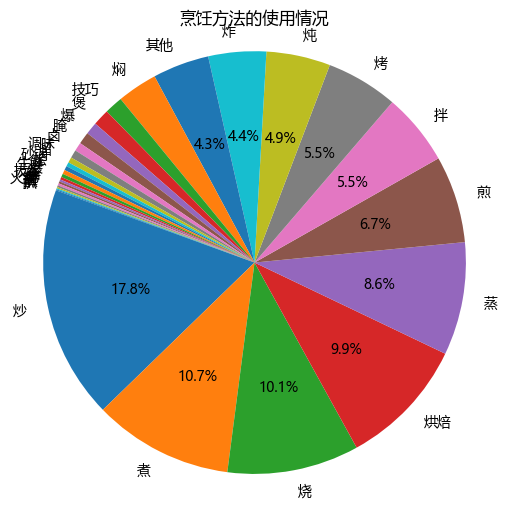

In [19]:
craft_counts = key_data['craft'].value_counts()
plt.figure(figsize=(6, 6))
def my_autopct(pct):
    return '{:.1f}%'.format(pct) if pct >= 4 else ''
plt.pie(craft_counts, labels=craft_counts.index, autopct= my_autopct, startangle=160)
plt.title('烹饪方法的使用情况')
plt.axis('equal') 
plt.savefig('烹饪方法词频.png')
plt.show()

### 绘制词云

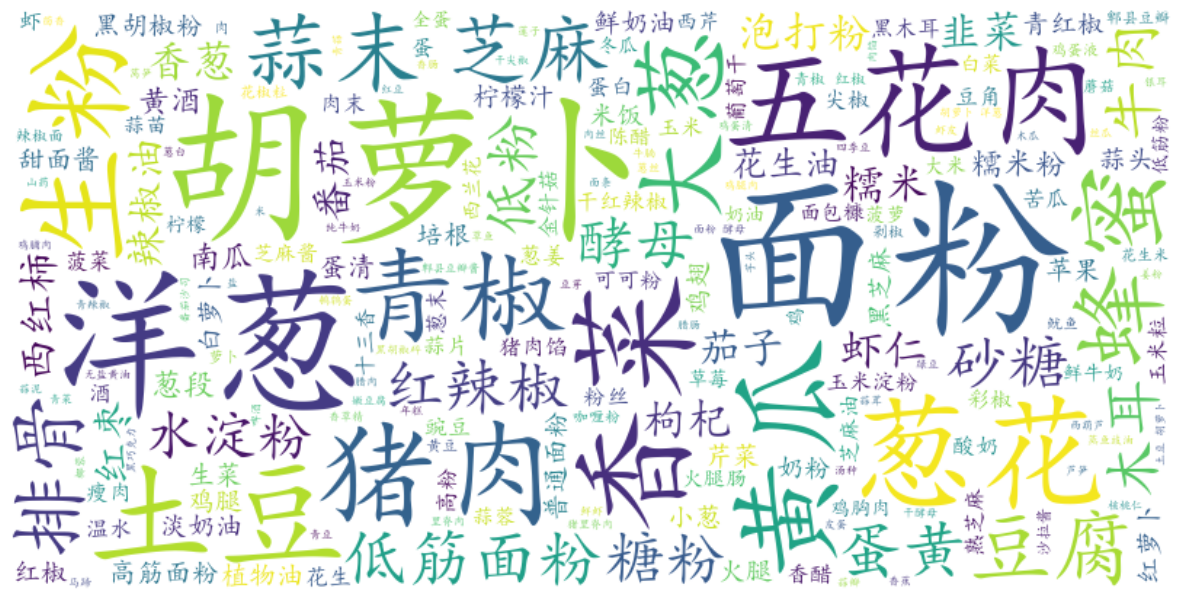

In [20]:
import os
from wordcloud import WordCloud
filtered_ingredients_list = [word for word in ingredients_list if word not in unwanted_words]
home_dir = os.path.expanduser("~")
font_path = os.path.join(home_dir, 'Desktop', 'kaiti.ttf')
ingredients_text = ' '.join(filtered_ingredients_list)
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(ingredients_text)
plt.figure(figsize=(15, 10))
wordcloud.to_file('wordcloud_image.png')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 提取食材和步骤的文本

In [21]:
recipes_text = []
for recipe in data:
    text = ''
    ingredients_text = ' '.join(recipe['ingredients'].values())
   # steps_text = ' '.join([step['content'] for step in recipe['steps']])
    text += ingredients_text# + ' ' + steps_text
    recipes_text.append(text)

### 计算余弦相似度

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(recipes_text)
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_similarity_df = pd.DataFrame(cosine_sim)
cosine_similarity_df

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,1.000000,0.000000,0.000000,0.505816,0.173307,0.282168,0.000000,0.085399,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.139924,0.187299,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,1.000000,0.030398,0.000000,0.078884,0.000000,0.065342,0.058018,0.465837,0.071137,...,0.443174,0.092770,0.443174,0.000000,0.190978,0.443174,0.086199,0.443174,0.443174,0.0
2,0.000000,0.030398,1.000000,0.150449,0.153033,0.056080,0.151469,0.225474,0.046940,0.355058,...,0.068591,0.014358,0.068591,0.045767,0.029558,0.068591,0.088910,0.068591,0.068591,0.0
3,0.505816,0.000000,0.150449,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028750,...,0.000000,0.000000,0.000000,0.088370,0.118290,0.000000,0.166634,0.000000,0.000000,0.0
4,0.173307,0.078884,0.153033,0.000000,1.000000,0.489289,0.404131,0.576331,0.097448,0.262904,...,0.000000,0.000000,0.000000,0.118931,0.000000,0.000000,0.143711,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.000000,0.443174,0.068591,0.000000,0.000000,0.000000,0.000000,0.130914,0.684340,0.000000,...,1.000000,0.209331,1.000000,0.000000,0.430932,1.000000,0.194504,1.000000,1.000000,0.0
4996,0.000000,0.086199,0.088910,0.166634,0.143711,0.000000,0.238082,0.237909,0.133107,0.064799,...,0.194504,0.040716,0.194504,0.087071,0.083818,0.194504,1.000000,0.194504,0.194504,0.0
4997,0.000000,0.443174,0.068591,0.000000,0.000000,0.000000,0.000000,0.130914,0.684340,0.000000,...,1.000000,0.209331,1.000000,0.000000,0.430932,1.000000,0.194504,1.000000,1.000000,0.0
4998,0.000000,0.443174,0.068591,0.000000,0.000000,0.000000,0.000000,0.130914,0.684340,0.000000,...,1.000000,0.209331,1.000000,0.000000,0.430932,1.000000,0.194504,1.000000,1.000000,0.0


### 停用词列表tfidf分析计算余弦相似度：

In [23]:
stop_words = ['的', '然后', '和', '你', '我', '们', '吃', '喝']
vectorizer = TfidfVectorizer(stop_words=stop_words)
tfidf_matrix = vectorizer.fit_transform(recipes_text)
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_similarity_df = pd.DataFrame(cosine_sim)
cosine_similarity_df

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,1.000000,0.000000,0.000000,0.505816,0.173307,0.282168,0.000000,0.085399,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.139924,0.187299,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,1.000000,0.030398,0.000000,0.078884,0.000000,0.065342,0.058018,0.465837,0.071137,...,0.443174,0.092770,0.443174,0.000000,0.190978,0.443174,0.086199,0.443174,0.443174,0.0
2,0.000000,0.030398,1.000000,0.150449,0.153033,0.056080,0.151469,0.225474,0.046940,0.355058,...,0.068591,0.014358,0.068591,0.045767,0.029558,0.068591,0.088910,0.068591,0.068591,0.0
3,0.505816,0.000000,0.150449,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028750,...,0.000000,0.000000,0.000000,0.088370,0.118290,0.000000,0.166634,0.000000,0.000000,0.0
4,0.173307,0.078884,0.153033,0.000000,1.000000,0.489289,0.404131,0.576331,0.097448,0.262904,...,0.000000,0.000000,0.000000,0.118931,0.000000,0.000000,0.143711,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.000000,0.443174,0.068591,0.000000,0.000000,0.000000,0.000000,0.130914,0.684340,0.000000,...,1.000000,0.209331,1.000000,0.000000,0.430932,1.000000,0.194504,1.000000,1.000000,0.0
4996,0.000000,0.086199,0.088910,0.166634,0.143711,0.000000,0.238082,0.237909,0.133107,0.064799,...,0.194504,0.040716,0.194504,0.087071,0.083818,0.194504,1.000000,0.194504,0.194504,0.0
4997,0.000000,0.443174,0.068591,0.000000,0.000000,0.000000,0.000000,0.130914,0.684340,0.000000,...,1.000000,0.209331,1.000000,0.000000,0.430932,1.000000,0.194504,1.000000,1.000000,0.0
4998,0.000000,0.443174,0.068591,0.000000,0.000000,0.000000,0.000000,0.130914,0.684340,0.000000,...,1.000000,0.209331,1.000000,0.000000,0.430932,1.000000,0.194504,1.000000,1.000000,0.0


In [24]:
print(cosine_similarity_df.columns)

RangeIndex(start=0, stop=5000, step=1)


### 获取烹饪方法和烹饪食材余弦相似推荐

In [25]:
def find_similar_recipes(recipe_index, cosine_sim_matrix, num_similar=3):
    similar_indices = np.argsort(cosine_sim_matrix[recipe_index])[::-1][1:num_similar+1]
    return similar_indices

query_recipe_index = 1000
similar_recipe_indices = find_similar_recipes(query_recipe_index, cosine_sim, num_similar=3)


#  推荐算法

### 基于内容的推荐算法，未停词，

In [26]:
print("与食谱 '{}' 最相似的三个食谱是：".format(data[query_recipe_index]['title']))
for index in similar_recipe_indices:
    print("- ", data[index]['title'])

与食谱 '香葱火腿棍子面包' 最相似的三个食谱是：
-  香蕉红糖小蛋糕
-  红烧鳝段
-  火锅涮羊肉


## 基于内容的推荐算法

### 获取烹饪方法和烹饪食材的余弦相似推荐

In [27]:
unwanted_words = ['盐', '糖', '油', '酱油', '醋', '姜', '葱', '蒜', '料酒', '胡椒粉',
                  '味精', '白糖', '冰糖', '香油', '淀粉', '生抽', '鸡精', '花椒', '老抽',
                  '辣椒', '孜然粉', '八角', '茴香粉', '桂皮', '料酒', '牛肉粉', '精盐', '生姜',
                  '食盐', '细砂糖', '大蒜', '料酒', '五香粉', '蚝油', '番茄酱', '米醋', '白醋',
                  '味精', '老抽', '红油', '红糖', '蚝油', '香菇粉', '老抽', '豆瓣酱', '白胡椒粉',
                  '料酒', '干辣椒', '花椒粉', '孜然', '胡椒面', '桂皮', '葱姜蒜', '豆豉', '白芝麻',
                  '椒盐', '生姜粉', '红薯粉', '猪油', '鸡蛋', '肉桂', '生抽酱油', '老抽酱油', '高汤',
                  '牛奶', '清汤', '水', '黄油', '鸡精', '味精', '番茄酱', '豆瓣酱', '大蒜末', '姜末',
                  '胡椒', '麻油', '辣椒酱', '豆豉', '花椒粉', '鱼露', '泡椒', '香叶', '丁香', '草果',
                  '肉桂', '八角', '酱油', '料酒', '白醋', '米醋', '红糖', '白砂糖', '橄榄油', '食用油',
                  '蚝油', '香菇粉', '虾米', '香菇', '鸡粉', '味精', '鸡精', '花雕酒', '清水', '香料',
                  '陈皮', '苹果醋', '苹果酱', '红酒', '白酒', '米酒', '鲍鱼汁', '鲍汁', '火锅底料',
                  '炖菜料', '调味料', '酱料', '辣椒粉', '辣酱', '火锅料', '火锅底料', '火锅调料','色拉油','黑胡椒','姜片','姜丝','腌料','大料','调料',
                  '腌料','酱油（调料A）','熟油','姜汁','熟猪油','葱姜末','生粉']
ingredient_craft_text = []
for recipe in data:
    titles_text=recipe['title']
    ingredients_text = ' '.join([ingredient for ingredient in recipe['ingredients'].keys() if ingredient not in unwanted_words])
    craft_text = recipe['craft']
    text = f" {titles_text} {ingredients_text} {craft_text}"
    ingredient_craft_text.append(text)
ingredient_craft_df = pd.DataFrame(ingredient_craft_text, columns=['Text'])

ingredient_craft_df.head(10)

,Text
0,红烧鸡翅 鸡翅中 烧
1,萝卜丝鲫鱼汤 鲫鱼 白萝卜丝 葱末 煮
2,沙茶牛肉 牛肉片 青椒片 洋葱片 沙茶酱 白酱油 蒜末 花生酱 炒
3,五彩鳝丝 鳝丝 黄椒丝 绿椒丝 红椒丝 冬笋丝 炒
4,香菇鲜肉盏 猪肉末 鸡蛋清 酒 蒸
5,碧绿虾仁 西兰花 虾仁 炒
6,剁椒蒸鱼头 鲢鱼头 剁椒 葱片 蒜片 葱花 蒸
7,黑椒牛柳 洋葱 牛肉 蒜茸 黑胡椒末 水淀粉 蛋清 嫩肉粉 炒
8,蜜橘鸡丁 鸡脯肉 蜜橘 蛋清 水淀粉 植物油 绍酒 炒
9,土家一罐香 猪肚 乌鸡 排骨 党参 枸杞 小葱 大葱片 焖


In [28]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(ingredient_craft_text)
cosine_sim1 = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_similarity_df = pd.DataFrame(cosine_sim1)
cosine_similarity_df

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.076547,0.0,0.0
3,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000,0.0,0.0
4996,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0
4997,0.0,0.0,0.076547,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0
4998,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.059898,0.0,0.0,...,0.092176,0.0,0.0,0.121766,0.0,0.0,0.0,0.000000,1.0,0.0


## 基于食材和烹饪方法的余弦相似推荐

In [29]:
def recommendrecipes(recipe_index, cosine_sim_matrix, num_similar=3):
    similar_indices = np.argsort(cosine_sim_matrix[recipe_index])[::-1][1:num_similar+1]
    return similar_indices

query_recipe_index = 100
similar_recipe_indices = recommendrecipes(query_recipe_index, cosine_sim1, num_similar=3)
print("与食谱 '{}' 最相似的三个食谱是：".format(data[query_recipe_index]['title']))
for index in similar_recipe_indices:
    print("- ", data[index]['title'])

与食谱 '香酥苹果派(甜梨派)' 最相似的三个食谱是：
-  甜梨派
-  甜梨派
-  酸奶蛋糕


### 食材方法，和味道

In [30]:
flavor_ingredient_craft_text = []
for recipe in data:
    titles_text=recipe['title']
    ingredients_text = ' '.join([ingredient for ingredient in recipe['ingredients'].keys() if ingredient not in unwanted_words])
    craft_text = recipe['craft']
    flavor_text= recipe['flavor']
    text = f"  {ingredients_text} {craft_text} {flavor_text}"
    flavor_ingredient_craft_text.append(text)
flavor_ingredient_craft_df = pd.DataFrame(flavor_ingredient_craft_text, columns=['Text'])
flavor_ingredient_craft_df

,Text
0,鸡翅中 烧 原味
1,鲫鱼 白萝卜丝 葱末 煮 原味
2,牛肉片 青椒片 洋葱片 沙茶酱 白酱油 蒜末 花生酱 炒 原味
3,鳝丝 黄椒丝 绿椒丝 红椒丝 冬笋丝 炒 原味
4,猪肉末 鸡蛋清 酒 蒸 原味
...,...
4995,咸肉 彩椒 金针菇 烤 原味
4996,嫩莴笋 彩椒条 炒 清淡
4997,长豆角 蒜末 拌 清淡
4998,土豆 洋葱 瘦肉 黑胡椒粉 煎 微辣


## 算法实现

In [31]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(flavor_ingredient_craft_text)
cosine_sim2 = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_similarity_df = pd.DataFrame(cosine_sim2)
cosine_similarity_df

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,1.000000,0.045393,0.027577,0.029644,0.059192,0.069889,0.036554,0.035401,0.035338,0.032457,...,0.046233,0.0,0.0,0.000000,0.0,0.050596,0.000000,0.000000,0.0,0.0
1,0.045393,1.000000,0.015207,0.016347,0.032642,0.038540,0.020158,0.019522,0.019487,0.017898,...,0.025495,0.0,0.0,0.000000,0.0,0.027901,0.000000,0.000000,0.0,0.0
2,0.027577,0.015207,1.000000,0.009931,0.019830,0.023414,0.012246,0.011860,0.011839,0.010874,...,0.015489,0.0,0.0,0.000000,0.0,0.016950,0.000000,0.097008,0.0,0.0
3,0.029644,0.016347,0.009931,1.000000,0.021317,0.025169,0.013164,0.012749,0.012726,0.011689,...,0.016650,0.0,0.0,0.000000,0.0,0.018221,0.000000,0.000000,0.0,0.0
4,0.059192,0.032642,0.019830,0.021317,1.000000,0.050257,0.026286,0.025457,0.025411,0.023339,...,0.033246,0.0,0.0,0.000000,0.0,0.036383,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.050596,0.027901,0.016950,0.018221,0.036383,0.042958,0.022468,0.021760,0.021721,0.019950,...,0.028418,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.0
4996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.218897,0.0,0.0
4997,0.000000,0.000000,0.097008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.218897,1.000000,0.0,0.0
4998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084001,0.000000,0.000000,...,0.139032,0.0,0.0,0.168281,0.0,0.000000,0.000000,0.000000,1.0,0.0


In [37]:
def recommendrecipes2(recipe_index, cosine_sim_matrix, num_similar=3):
    similar_indices = np.argsort(cosine_sim_matrix[recipe_index])[::-1][1:num_similar+1]
    return similar_indices

query_recipe_index = 100
similar_recipe_indices = recommendrecipes2(query_recipe_index, cosine_sim2, num_similar=3)
print("与食谱 '{}' 最相似的三个食谱是：".format(data[query_recipe_index]['title']))
for index in similar_recipe_indices:
    print("- ", data[index]['title'])

与食谱 '香酥苹果派(甜梨派)' 最相似的三个食谱是：
-  蔓越莓奶酥
-  葡萄奶酥
-  虎皮蛋糕卷


In [48]:
def recommend_recipes(user_input_index, cosine_sim_matrix, data, user_selection, num_similar=3):
    # 获取用户输入的食谱索引对应的余弦相似度行
    similarity_scores = cosine_sim_matrix[user_input_index]
    
    # 找到相似度最高的食谱索引
    similar_indices = np.argsort(similarity_scores)[::-1][1:num_similar+1]
    
    # 输出推荐的食谱标题
    print("推荐的食谱是：")
    for index in similar_indices:
        print("- ", data[index]['title'])
    
    # 输出用户选择信息
    print("用户选择的食谱是：", data[user_selection[0]]['title'])
    print("用户选择的食材是：", user_selection[1])
    print("用户选择的口味是：", user_selection[2])
    print("用户选择的烹饪方法是：", user_selection[3])

# 示例：用户输入的食谱索引、用户选择信息和余弦相似度矩阵
query_recipe_index = 100
user_selection = [query_recipe_index, '肉', '甜', '煮']
cosine_sim_matrix = cosine_sim2
recommend_recipes(query_recipe_index, cosine_sim_matrix, data, user_selection)


推荐的食谱是：
-  蔓越莓奶酥
-  葡萄奶酥
-  虎皮蛋糕卷
用户选择的食谱是： 香酥苹果派(甜梨派)
用户选择的食材是： 肉
用户选择的口味是： 甜
用户选择的烹饪方法是： 煮
